### in this notebook we'll save a pytorch model in the onnx format

let's create a model that accepts a single number as the input. we'll do this to test it in the browser, after implementing the onnx model in a django app 

In [1]:
import torch 
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def f1(x):
    return 3*x + 3

In [32]:
x = torch.rand(1000, dtype=torch.float32) * 10

In [33]:
x.shape

torch.Size([1000])

In [34]:
x

tensor([2.0136e+00, 5.6412e+00, 6.4871e+00, 2.5614e+00, 6.0778e+00, 3.8145e+00,
        5.7550e+00, 6.5181e+00, 2.9990e+00, 1.7723e+00, 6.2921e+00, 1.7158e-02,
        2.2932e+00, 3.2270e+00, 8.4773e+00, 8.4679e+00, 5.6535e-03, 6.3810e+00,
        3.3817e+00, 5.7616e+00, 5.2694e+00, 8.4499e+00, 6.0509e+00, 4.7457e+00,
        2.6016e+00, 2.6695e+00, 2.1970e+00, 5.7417e+00, 5.8717e+00, 6.6584e+00,
        5.9193e+00, 7.7389e-01, 7.8058e+00, 5.5590e+00, 9.6808e+00, 5.0285e+00,
        8.2233e-02, 8.0738e+00, 1.6615e+00, 3.3048e-01, 2.4262e+00, 6.2964e+00,
        4.3784e+00, 7.3994e+00, 5.4813e+00, 1.1993e+00, 2.0152e+00, 1.9592e+00,
        3.8052e+00, 4.3576e+00, 3.7671e+00, 6.5782e+00, 9.9255e+00, 5.4427e+00,
        2.7886e-01, 9.5609e+00, 7.4572e+00, 1.8235e+00, 1.6113e+00, 5.1149e-02,
        7.6266e+00, 1.2989e+00, 1.9377e+00, 9.1399e+00, 4.5254e+00, 7.7639e-01,
        6.6006e+00, 2.4572e-01, 5.8215e-01, 8.9050e+00, 8.3553e+00, 3.8000e+00,
        7.8419e-01, 3.3113e+00, 1.4821e+

In [35]:
y = f1(x)

In [36]:
y

tensor([ 9.0407, 19.9237, 22.4614, 10.6841, 21.2334, 14.4434, 20.2649, 22.5543,
        11.9971,  8.3168, 21.8763,  3.0515,  9.8795, 12.6809, 28.4318, 28.4037,
         3.0170, 22.1429, 13.1451, 20.2847, 18.8083, 28.3496, 21.1528, 17.2372,
        10.8049, 11.0086,  9.5911, 20.2250, 20.6151, 22.9751, 20.7580,  5.3217,
        26.4173, 19.6770, 32.0423, 18.0855,  3.2467, 27.2213,  7.9846,  3.9914,
        10.2785, 21.8891, 16.1351, 25.1983, 19.4440,  6.5978,  9.0455,  8.8776,
        14.4157, 16.0728, 14.3012, 22.7347, 32.7766, 19.3281,  3.8366, 31.6826,
        25.3715,  8.4705,  7.8339,  3.1534, 25.8799,  6.8968,  8.8130, 30.4196,
        16.5763,  5.3292, 22.8018,  3.7372,  4.7464, 29.7150, 28.0658, 14.4001,
         5.3526, 12.9340,  7.4463, 28.8660, 29.5076, 25.4599,  6.1399, 24.7896,
        11.1643, 12.0463, 16.6796, 31.8254, 17.9947, 11.9302, 24.3032, 17.5275,
         5.6922, 21.4973, 31.8520, 11.8298, 32.9930, 21.5797,  6.5209,  5.7524,
         9.1288,  4.0271, 23.2268, 15.82

In [37]:
trainx = x[0:800]
trainy = y[0:800]
testx = x[800:]
testy = y[800:]

In [38]:
trainx.shape, trainy.shape, testx.shape, testy.shape

(torch.Size([800]), torch.Size([800]), torch.Size([200]), torch.Size([200]))

In [39]:
trainx.unsqueeze_(1)
trainy.unsqueeze_(1)
testx.unsqueeze_(1)
testy.unsqueeze_(1)

tensor([[14.7691],
        [17.8739],
        [10.9041],
        [21.9696],
        [24.4964],
        [12.5364],
        [17.5524],
        [ 9.4842],
        [22.8893],
        [26.2530],
        [ 8.5345],
        [24.7383],
        [17.0487],
        [15.3377],
        [29.6840],
        [ 4.2507],
        [18.4797],
        [27.0699],
        [25.6807],
        [20.4961],
        [12.6369],
        [20.8644],
        [13.4216],
        [27.6568],
        [11.0389],
        [ 5.0034],
        [32.9149],
        [14.4190],
        [13.9858],
        [14.6051],
        [29.1378],
        [32.8272],
        [15.9624],
        [ 9.9567],
        [ 7.3736],
        [18.8133],
        [ 4.1133],
        [ 7.9646],
        [19.1101],
        [17.4189],
        [25.4093],
        [ 6.9346],
        [ 9.4943],
        [17.0120],
        [14.3036],
        [27.3284],
        [ 5.7465],
        [ 8.2612],
        [ 8.3726],
        [ 8.8097],
        [21.0026],
        [ 7.6202],
        [32.

In [40]:
trainx.shape, trainy.shape, testx.shape, testy.shape

(torch.Size([800, 1]),
 torch.Size([800, 1]),
 torch.Size([200, 1]),
 torch.Size([200, 1]))

In [41]:
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

In [42]:
class Model1(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1,1)
        
    def forward(self, x):
        x = self.fc1(x)
        
        return x

In [43]:
model1 = Model1()

In [44]:
model1

Model1(
  (fc1): Linear(in_features=1, out_features=1, bias=True)
)

In [45]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model1.parameters())

In [46]:
# parameters
epochs = 500

Note: stochastic gradient descent is used below. the weights are updated after a forward pass through each sample.

In [47]:
print_every = 50
running_loss = []
for i in range(epochs):
    for (x,y) in zip(trainx, trainy):
        optimizer.zero_grad()
        output = model1(x)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
        
    running_loss.append(loss.item())
    if i%print_every == 0:
        print(f'epoch: {i}, loss: {loss.item()}')

epoch: 0, loss: 301.9672546386719
epoch: 50, loss: 0.0
epoch: 100, loss: 0.0
epoch: 150, loss: 0.0
epoch: 200, loss: 0.0
epoch: 250, loss: 0.0
epoch: 300, loss: 0.0
epoch: 350, loss: 0.0
epoch: 400, loss: 0.0
epoch: 450, loss: 0.0


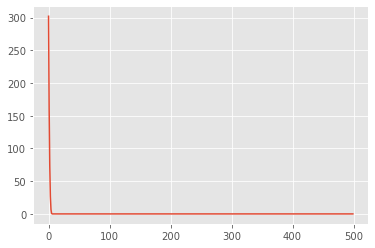

In [48]:
plt.style.use('ggplot')
plt.plot(np.arange(len(running_loss)), running_loss)

let's test the model

In [49]:
running_test_loss = []

model1.eval()
for (x,y) in zip(testx, testy):
    output = model1(x)
    loss = criterion(output, y)

    running_test_loss.append(loss.item())


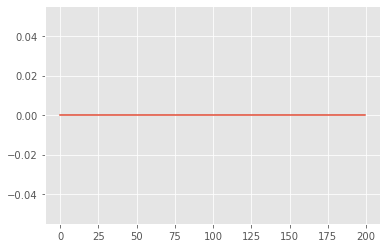

In [50]:
plt.style.use('ggplot')
plt.plot(np.arange(len(running_test_loss)), running_test_loss)

let's do a manual check

In [51]:
model1.fc1.weight

Parameter containing:
tensor([[3.]], requires_grad=True)

In [52]:
model1.fc1.bias

Parameter containing:
tensor([3.], requires_grad=True)

as shown above the model trained to get the correct weight and bias

In [53]:
testnum = 0.134
testnum = torch.tensor(testnum, dtype=torch.float32).unsqueeze(0).unsqueeze(1)
print(f'real value = {f1(testnum)}')
print(f'predicted value = {model1(testnum)}')

real value = tensor([[3.4020]])
predicted value = tensor([[3.4020]], grad_fn=<AddmmBackward0>)


### let's save the model in the onnx format

In [54]:
dummy_input = torch.tensor(1.0, dtype=torch.float32).unsqueeze(0).unsqueeze(1)
torch.onnx.export(model1, dummy_input, 'simple_linear.onnx', verbose=True)

graph(%input : Float(1, 1, strides=[1, 1], requires_grad=0, device=cpu),
      %fc1.weight : Float(1, 1, strides=[1, 1], requires_grad=1, device=cpu),
      %fc1.bias : Float(1, strides=[1], requires_grad=1, device=cpu)):
  %3 : Float(1, 1, strides=[1, 1], requires_grad=1, device=cpu) = onnx::Gemm[alpha=1., beta=1., transB=1](%input, %fc1.weight, %fc1.bias) # /home/amoel/anaconda3/envs/udacitycvenv/lib/python3.9/site-packages/torch/nn/functional.py:1848:0
  return (%3)

